<a href="https://colab.research.google.com/github/RushilPatel0703/ACML_Project/blob/tristen/ACML_Project_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
%matplotlib inline
sns.set_style("darkgrid")

In [52]:
url = 'https://raw.githubusercontent.com/RushilPatel0703/ACML_Project/main/data.csv'
data = pd.read_csv(url)

In [53]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [56]:
# # fill missing values
# df = data.fillna({"Age": data.Age.median(), "Embarked": data.Embarked.mode()[0]})

# one-hot-encoding
df = data.get_dummies(df, columns=["ROA(C) before interest and depreciation before interest", "ROA(A) before interest and % after tax", "ROA(B) before interest and depreciation after tax", "Operating Gross Margin	", "Realized Sales Gross Margin	"])

# min-max-scaling
scaler = MinMaxScaler()
df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])

df.head()

AttributeError: ignored

In [11]:
X = data.drop('Bankrupt?',axis=1)
y = data['Bankrupt?']

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_2 = LabelEncoder()
X.loc[:, 2] = labelencoder_X_2.fit_transform(X.iloc[:, 2])

In [15]:
labelencoder_X_1 = LabelEncoder()
X.loc[:, 1] = labelencoder_X_1.fit_transform(X.iloc[:, 1])

In [31]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(predictions, labels):
    N = labels.size 
    mse = ((predictions - labels)**2).sum() / (2*N)
    return mse

def accuracy(predictions, labels):
    predicions_correct = predictions.round() == labels
    accuracy = predicions_correct.mean()
    
    return accuracy

In [47]:
learning_rate = 0.1
epochs = 10000

n_input = 97
n_hidden = 0
n_output = 1

In [48]:
np.random.seed(10)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (97, 4)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (4, 1)

In [49]:
N = y_train.size
monitoring = {"mean_squared_error": [], "accuracy": []}
for epoch in range(epochs):

    # feedforward
    hidden_layer = sigmoid(np.dot(X_train, weights_1))        # (712, 4)
    output_layer = sigmoid(np.dot(hidden_layer, weights_2))   # (712, 1)
    
    # monitor training process
    acc = accuracy(output_layer, y_train)
    mse = mean_squared_error(output_layer, y_train)
    monitoring["accuracy"].append(acc)
    monitoring["mean_squared_error"].append(mse)
 
    # backpropagation
    output_layer_delta = (output_layer - y_train) * output_layer * (1 - output_layer)                 # (712, 1)
    hidden_layer_delta = np.dot(output_layer_delta, weights_2.T) * hidden_layer * (1 - hidden_layer)  # (712, 4)

    # weight updates
    weights_2 -= learning_rate * np.dot(hidden_layer.T, output_layer_delta) / N   # (4, 1)
    weights_1 -= learning_rate * np.dot(X_train.T, hidden_layer_delta) / N        # (24, 4)

monitoring_df = pd.DataFrame(monitoring)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


ValueError: ignored

NameError: ignored

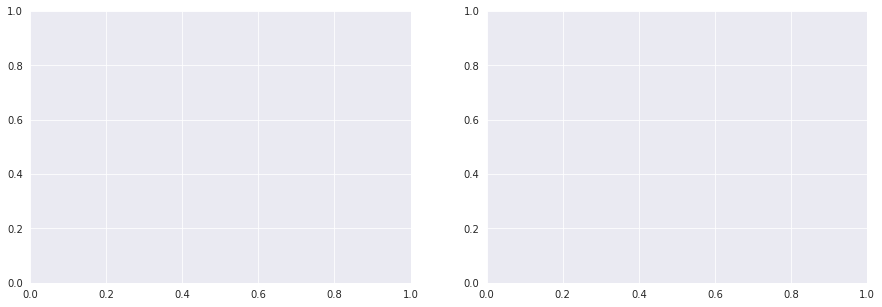

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

monitoring_df.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring_df.accuracy.plot(ax=axes[1], title="Accuracy");

In [45]:
# feedforward
hidden_layer_inputs = np.dot(x_test, weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)

NameError: ignored

In [46]:
acc = accuracy(output_layer_outputs, y_test)
print("Accuracy: {}".format(acc))

NameError: ignored